In [2]:
from HarrisCornerDetector import HarrisCornerDetector
import matplotlib.pyplot as plt
import cv2

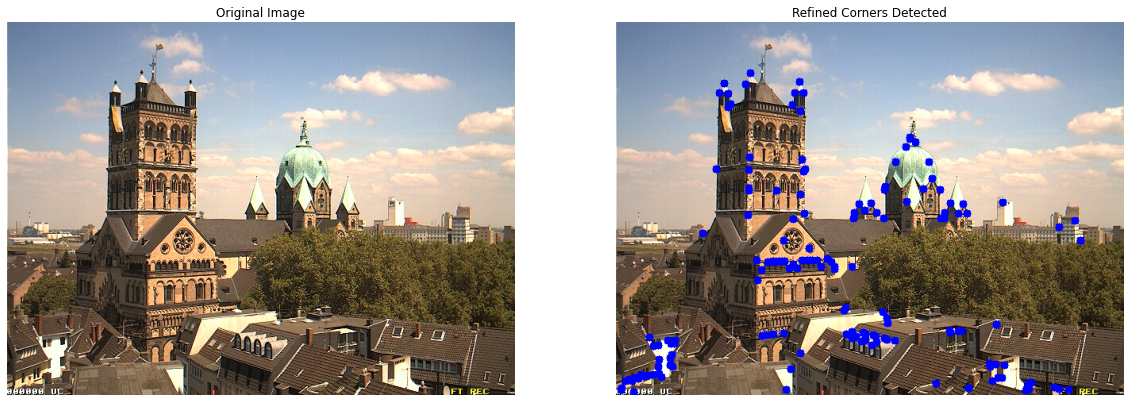

In [4]:
# Test the updated HarrisCornerDetector with Non-Maximal Suppression
hcd = HarrisCornerDetector(window_size=5)
corner_image = hcd.find_corners("hpatches/i_castle/1.ppm")

# Show the original image and the image with refined corners marked
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title("Refined Corners Detected")
plt.axis("off")
plt.show()

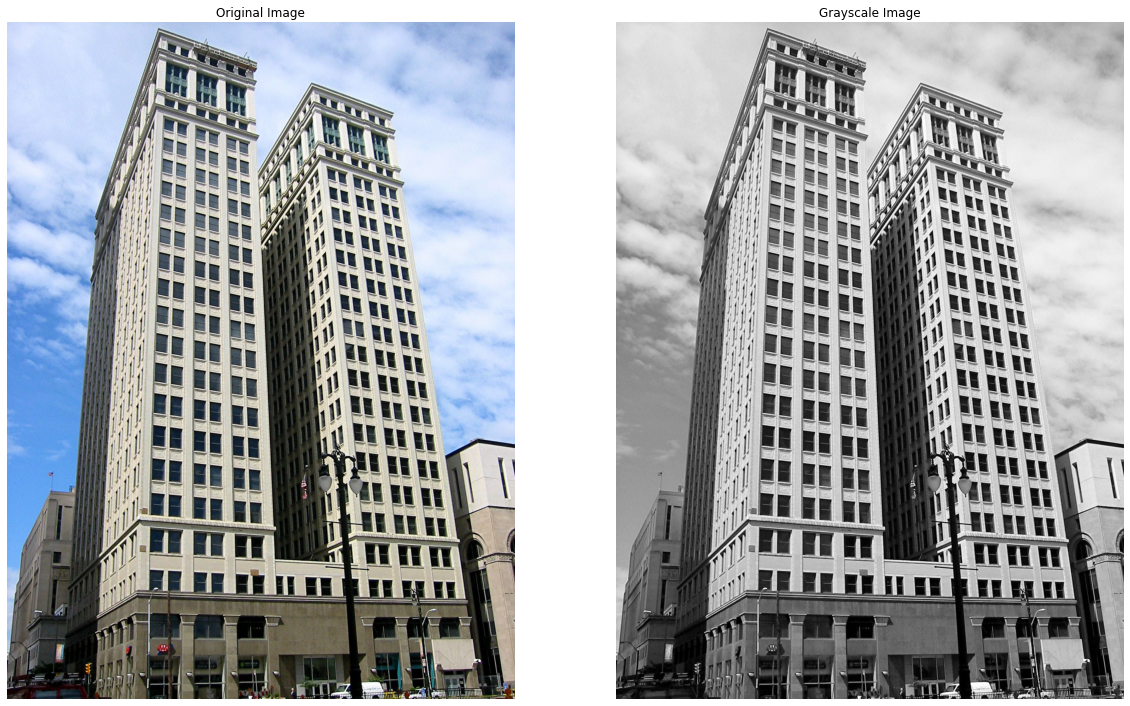

In [3]:
hcd = HarrisCornerDetector(window_size=5, k=0.04)
hcd.load_image("/usr/mvl2/lgsm2n/blog/HarrisCorner/dime_building_clean.jpg")
image = hcd.image
gray_image = hcd.gray_image

# Show the original image and the image with refined corners marked
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(hcd.gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

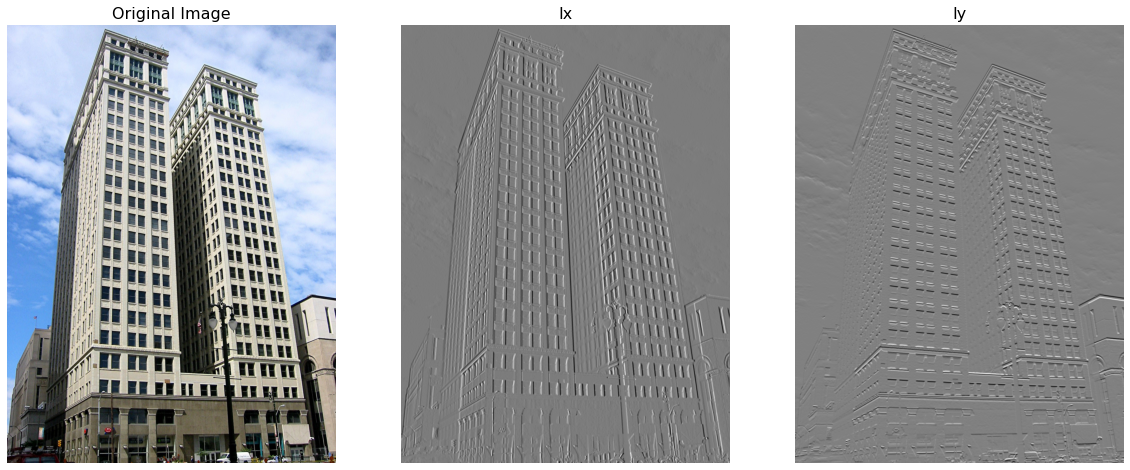

In [4]:
# computing gradients
hcd.apply_gaussian_blur()
hcd.compute_gradients()
Ix = hcd.Ix
Iy = hcd.Iy

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")

# Second subplot
axs[1].imshow(hcd.Ix, cmap="gray")
axs[1].set_title("Ix", fontsize=16)
axs[1].axis("off")

# Third subplot
axs[2].imshow(hcd.Iy, cmap="gray")
axs[2].set_title("Iy", fontsize=16)
axs[2].axis("off")

# Show the figure
plt.show()

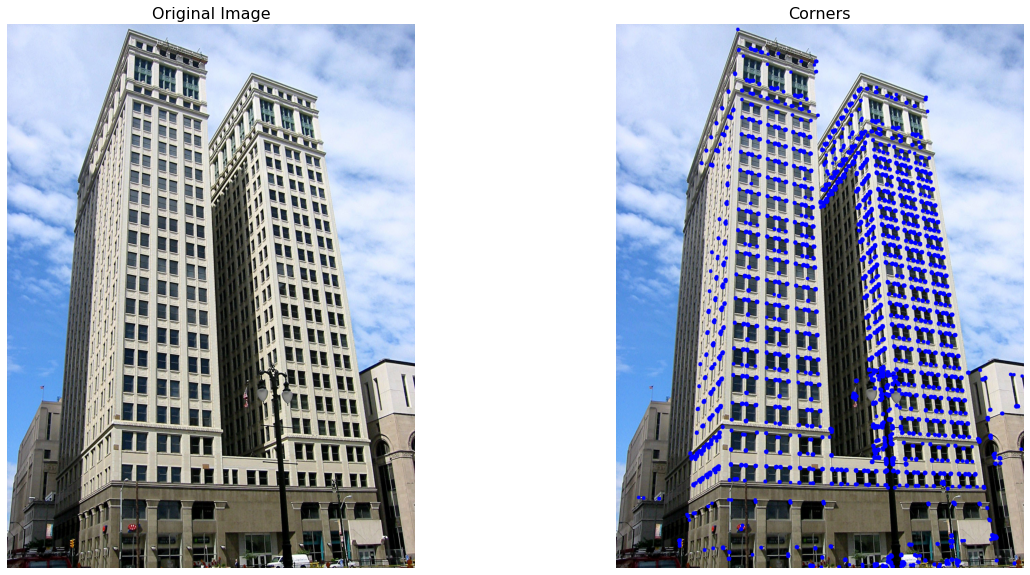

In [5]:
hcd.detect_corners()

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")

corner_imgs = hcd.mark_corners(threshold_ratio=0.1)

# Second subplot
axs[1].imshow(cv2.cvtColor(corner_imgs, cv2.COLOR_BGR2RGB))
axs[1].set_title("Corners", fontsize=16)
axs[1].axis("off")

# Show the figure
plt.show()

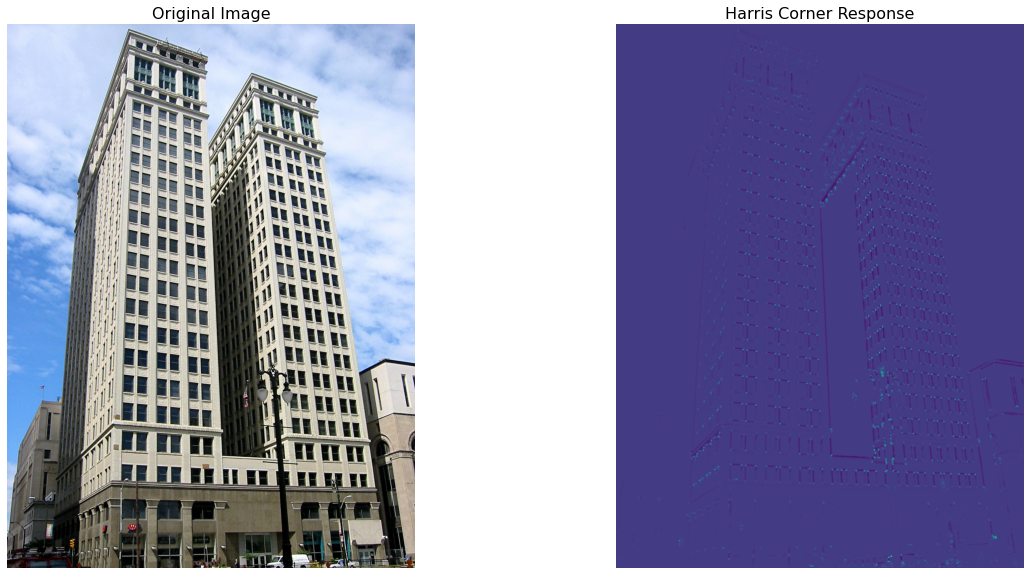

In [6]:
# displaying the harris corner response
hcd.detect_corners()

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")

# corner_imgs = hcd.mark_corners(threshold_ratio=0.1)

# normalizing response for display onto image
normalized_response = cv2.normalize(
    hcd.R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

# Second subplot
axs[1].imshow(normalized_response)
axs[1].set_title("Harris Corner Response", fontsize=16)
axs[1].axis("off")

# Show the figure
plt.show()

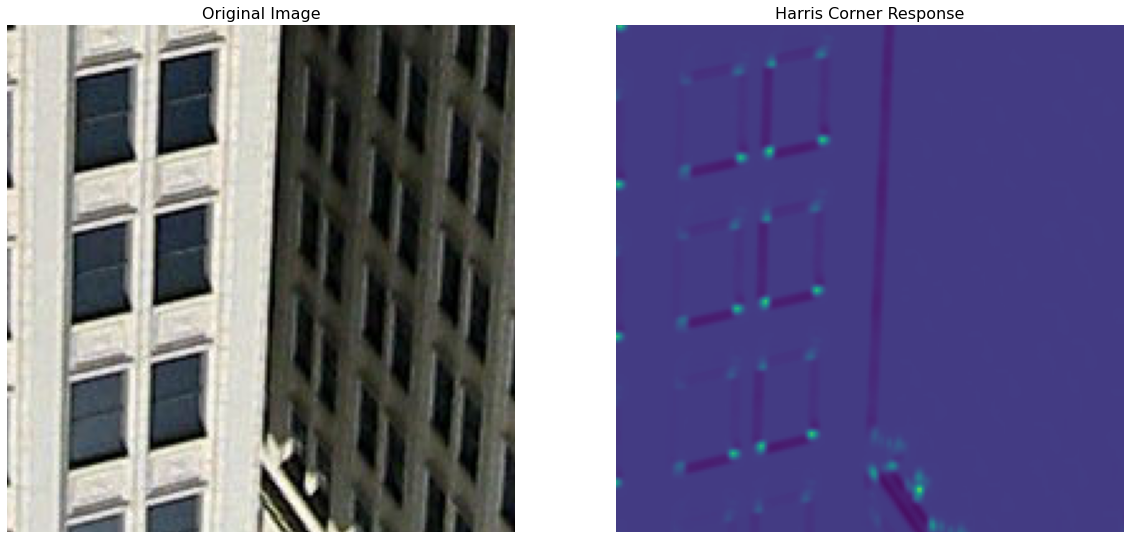

In [7]:
# zoomed in response
# displaying the harris corner response
hcd.detect_corners()

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")
axs[0].set_xlim(500, 700)
axs[0].set_ylim(500, 700)

# corner_imgs = hcd.mark_corners(threshold_ratio=0.1)

# normalizing response for display onto image
normalized_response = cv2.normalize(
    hcd.R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

# Second subplot
axs[1].imshow(normalized_response)
axs[1].set_title("Harris Corner Response", fontsize=16)
axs[1].axis("off")
axs[1].set_xlim(500, 700)
axs[1].set_ylim(500, 700)

# Show the figure
plt.show()

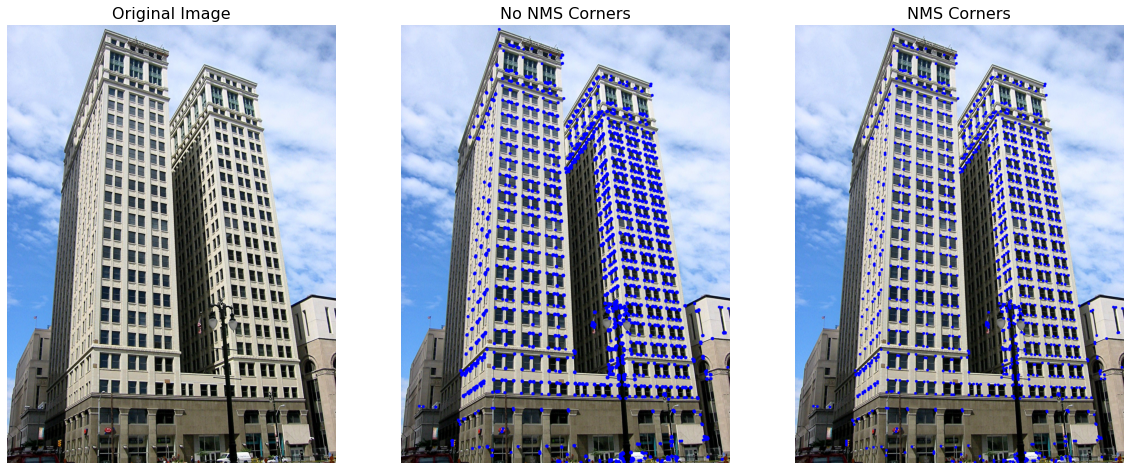

In [13]:
# NMS

hcd.detect_corners()

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")

corner_imgs = hcd.mark_corners()

axs[1].imshow(cv2.cvtColor(corner_imgs, cv2.COLOR_BGR2RGB))
axs[1].set_title("No NMS Corners", fontsize=16)
axs[1].axis("off")

hcd.apply_non_maximal_suppression()
corner_imgs = hcd.mark_corners()

# Second subplot
axs[2].imshow(cv2.cvtColor(corner_imgs, cv2.COLOR_BGR2RGB))
axs[2].set_title("NMS Corners", fontsize=16)
axs[2].axis("off")

# Show the figure
plt.show()

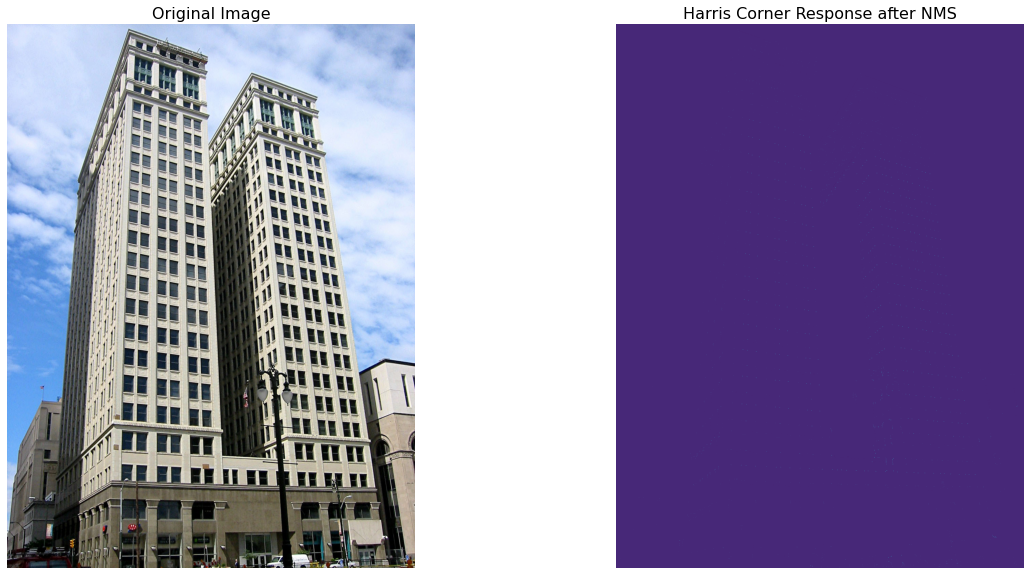

In [9]:
# displaying the harris corner response
hcd.detect_corners()

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")

hcd.apply_non_maximal_suppression()
# normalizing response for display onto image
normalized_response = cv2.normalize(
    hcd.R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

# Second subplot
axs[1].imshow(normalized_response)
axs[1].set_title("Harris Corner Response after NMS", fontsize=16)
axs[1].axis("off")

# Show the figure
plt.show()

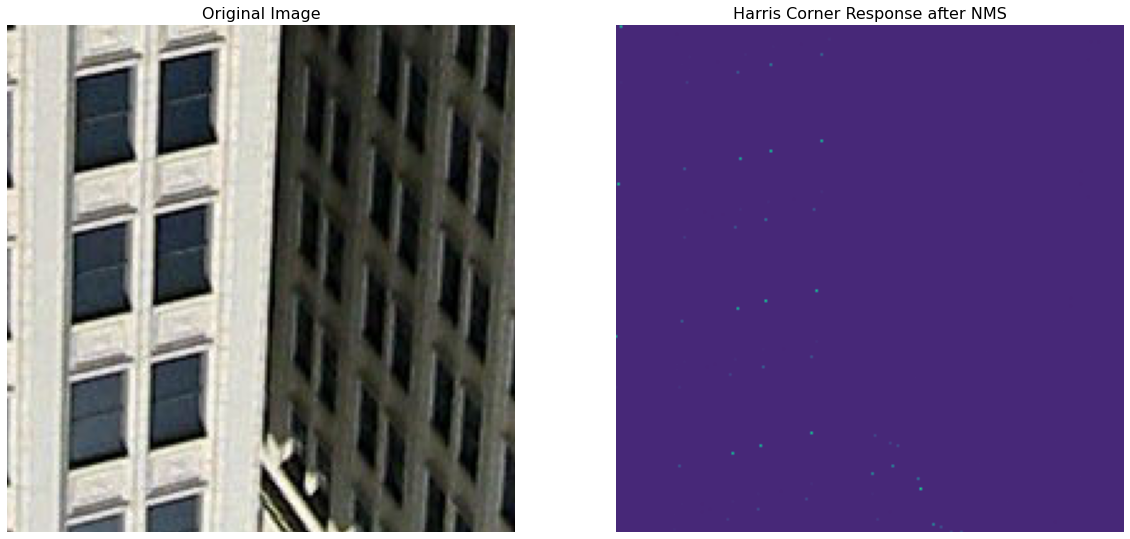

In [10]:
# zoomed in response
# displaying the harris corner response
hcd.detect_corners()

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Set background color for the figure and axes to white
fig.patch.set_facecolor("white")
for ax in axs:
    ax.set_facecolor("white")

# Plot data in each subplot
# First subplot
axs[0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")
axs[0].set_xlim(500, 700)
axs[0].set_ylim(500, 700)

hcd.apply_non_maximal_suppression()
# normalizing response for display onto image
normalized_response = cv2.normalize(
    hcd.R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

# Second subplot
axs[1].imshow(normalized_response)
axs[1].set_title("Harris Corner Response after NMS", fontsize=16)
axs[1].axis("off")
axs[1].set_xlim(500, 700)
axs[1].set_ylim(500, 700)

# Show the figure
plt.show()

### All of the steps

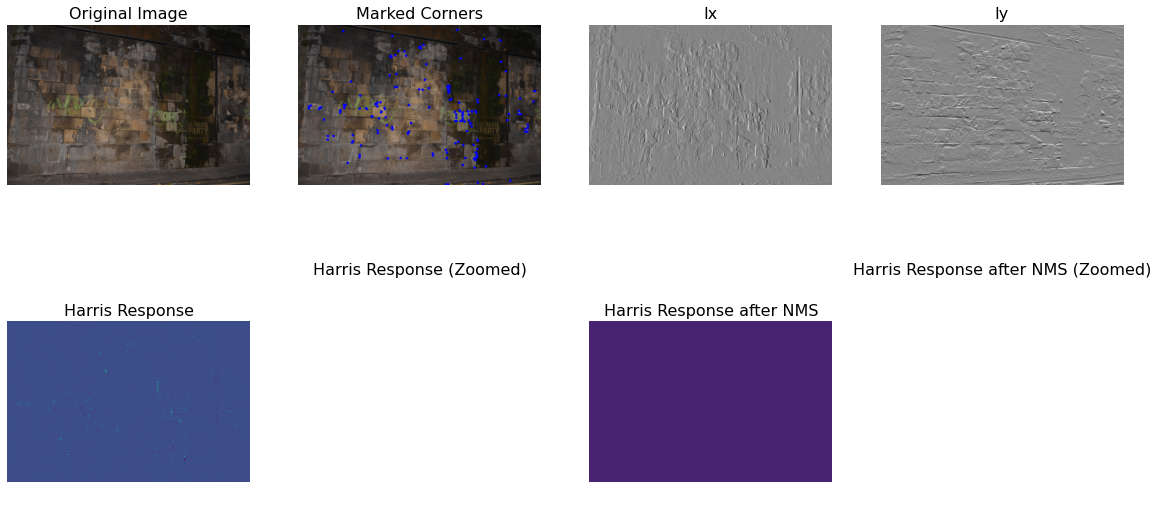

In [4]:
hcd = HarrisCornerDetector(window_size=5, k=0.04)
hcd.load_image("/usr/mvl2/lgsm2n/blog/HarrisCorner/hpatches/v_wall/1.ppm")
image = hcd.image
gray_image = hcd.gray_image

# Initialize the figure and subplot layout (1 row, 3 columns)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Set background color for the figure and axes to white
# fig.patch.set_facecolor('white')
# for ax in axs:
#     ax.set_facecolor('white')

# Plot data in each subplot
# First subplot
axs[0][0].imshow(cv2.cvtColor(hcd.image, cv2.COLOR_BGR2RGB))
axs[0][0].set_title("Original Image", fontsize=16)
axs[0][0].axis("off")

# Second subplot
# axs[0][1].imshow(hcd.gray_image, cmap='gray')
# axs[0][1].set_title('Gray Image', fontsize=16)
# axs[0][1].axis('off')

hcd.apply_gaussian_blur()
hcd.compute_gradients()
Ix = hcd.Ix
Iy = hcd.Iy

axs[0][2].imshow(hcd.Ix, cmap="gray")
axs[0][2].set_title("Ix", fontsize=16)
axs[0][2].axis("off")

axs[0][3].imshow(hcd.Iy, cmap="gray")
axs[0][3].set_title("Iy", fontsize=16)
axs[0][3].axis("off")

axs[0][3].imshow(hcd.Iy, cmap="gray")
axs[0][3].set_title("Iy", fontsize=16)
axs[0][3].axis("off")

hcd.detect_corners()
normalized_response = cv2.normalize(
    hcd.R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

axs[1][0].imshow(normalized_response)
axs[1][0].set_title("Harris Response", fontsize=16)
axs[1][0].axis("off")

axs[1][1].imshow(normalized_response)
axs[1][1].set_title("Harris Response (Zoomed)", fontsize=16)
axs[1][1].axis("off")
axs[1][1].set_xlim(900, 1100)
axs[1][1].set_ylim(900, 1100)

hcd.apply_non_maximal_suppression()
# normalizing response for display onto image
normalized_response_nms = cv2.normalize(
    hcd.R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

axs[1][2].imshow(normalized_response_nms)
axs[1][2].set_title("Harris Response after NMS", fontsize=16)
axs[1][2].axis("off")

axs[1][3].imshow(normalized_response_nms)
axs[1][3].set_title("Harris Response after NMS (Zoomed)", fontsize=16)
axs[1][3].axis("off")
axs[1][3].set_xlim(900, 1100)
axs[1][3].set_ylim(900, 1100)

# marking corners
corner_imgs = hcd.mark_corners()

axs[0][1].imshow(cv2.cvtColor(corner_imgs, cv2.COLOR_BGR2RGB))
axs[0][1].set_title("Marked Corners", fontsize=16)
axs[0][1].axis("off")

# Show the figure
plt.show()